In [56]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [74]:
images = 'C:/Sam/Scuola/02_UniBo/2_anno/ML4CV/Brandeburg/dense/images_colmap/'
output = 'C:/Sam/Scuola/02_UniBo/2_anno/ML4CV/Brandeburg/dense/images_cropped/'

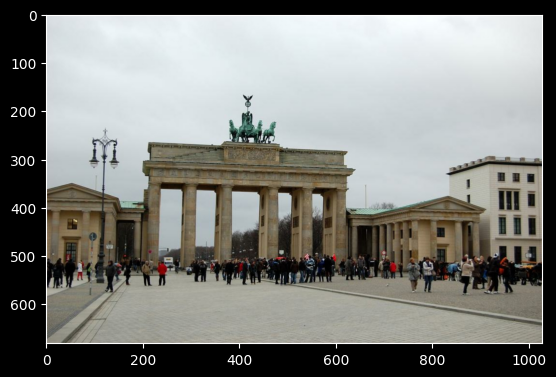

In [58]:
i=0
name=os.listdir(images)[i]
img = cv2.imread(images+name)

plt.imshow(img[...,[2,1,0]])

In [59]:
shapes=[]
for name in os.listdir(images):
    img = cv2.imread(images+name)
    shapes.append(img.shape[:2])

In [60]:
shapes=np.array(shapes)

In [61]:
shapes.shape

(763, 2)

In [62]:
M=np.max(shapes, axis=0)
M

array([1095, 1102])

In [63]:
tot=np.zeros(np.max(shapes, axis=0))
for x,y in shapes:
    tot[x-1,y-1]+=1

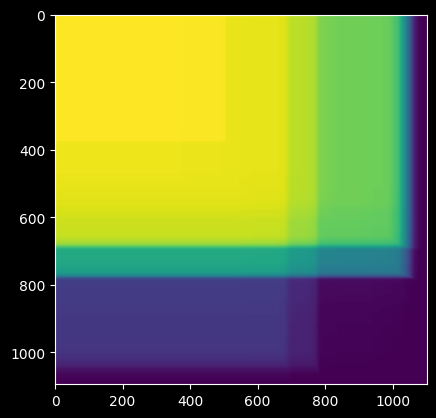

In [64]:
cum_tot=np.cumsum(np.cumsum(tot[::-1,::-1],0),1)[::-1,::-1]
plt.imshow(cum_tot)

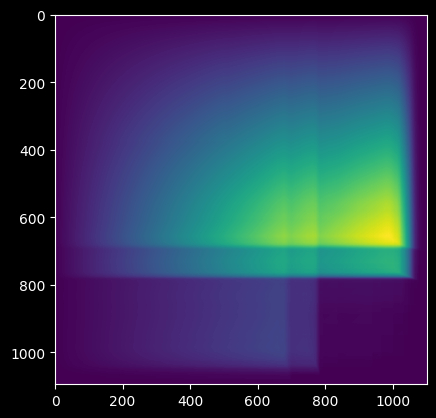

In [65]:
area=(np.arange(M[0])[:,None]+1)*(np.arange(M[1])+1)
cum_area=area*cum_tot
plt.imshow(cum_area)

In [69]:
S=np.array(np.where(cum_area==np.max(cum_area)))
S

array([[657],
       [989]], dtype=int64)

In [ ]:
print()

In [75]:
for name in os.listdir(images):
    img = cv2.imread(images+name)
    s=img.shape[:2]
    if s[0]>(S[0]+1) and s[1]>(S[1]+1):
        x1=int(s[0]//2-(S[0]+1)//2)
        x2=int(s[0]//2+(S[0]+2)//2)
        y1=int(s[1]//2-(S[1]+1)//2)
        y2=int(s[1]//2+(S[1]+2)//2)
        img=img[x1:x2,y1:y2]
        cv2.imwrite(output+name, img)
        print(name)

00315862_6836283050.jpg
00436870_59297810.jpg
00609395_7226852998.jpg
00787747_3221432213.jpg
00883281_9633489441.jpg
01069771_8567470929.jpg
01473103_2691761403.jpg
01587180_6880119979.jpg
01738801_5114523193.jpg
01911720_4970488279.jpg
02516180_10994677186.jpg
02566955_9377454362.jpg
02749394_3866382383.jpg
03034452_4601940001.jpg
03154363_5457548277.jpg
03234383_10253641595.jpg
03528982_4163624176.jpg
03683934_363624591.jpg
03829260_438904431.jpg
04015833_4640057700.jpg
04065134_2407408396.jpg
04371528_389640014.jpg
04729261_2862939197.jpg
04800984_8342094434.jpg
05103925_5229366243.jpg
05714706_2362913557.jpg
05755941_130365389.jpg
06832993_8178963703.jpg
06863689_7353555136.jpg
06935805_2163586273.jpg
07457740_6371609803.jpg
08158971_2821952368.jpg
08468928_1469537330.jpg
08507139_7168341023.jpg
08938701_6239417031.jpg
09234134_4947371805.jpg
09237518_3859534957.jpg
09390945_765838744.jpg
09870003_7184351941.jpg
10039241_8387996514.jpg
10502455_6696542067.jpg
10605892_4176363979.j